In [1]:
from numpy import median
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#giving names to the columns of the dataset
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year','Origin']

#read data from the file
#give the name of the columns from the cols array
# the na values are all the values with ? mark
# all the data after "\t" should be ignored
#skipinitialspace=True -> remove the initial space of data
data_frame = pd.read_csv("auto-mpg.data",names=cols,na_values="?",comment='\t',sep=" ",skipinitialspace=True)

#copy the dataframe into data variable
data = data_frame.copy()

#print the first 5 rows of dataframe 
print("\nINFO IN DATASET : \n")
print(data.head(5))


INFO IN DATASET : 

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [3]:

#gives details of the data in the dataset
print("\nDATA INFO: \n")
print(data.info())


DATA INFO: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.9 KB
None


In [4]:
#check if there are any null values
print("\n NUMBER OF NULL VALUES IN THE DATASET: \n")
print(data.isnull().sum())
print("\n CHECK FOR NULL VALUES IN THE DATASET: \n")
print(data.isnull().any())



 NUMBER OF NULL VALUES IN THE DATASET: 

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

 CHECK FOR NULL VALUES IN THE DATASET: 

MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool


In [5]:

print("\n STATISTICAL DATA ABOUT DATASET: \n")
print(data.describe())



 STATISTICAL DATA ABOUT DATASET: 

              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year      Origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.00

<AxesSubplot:xlabel='Horsepower'>

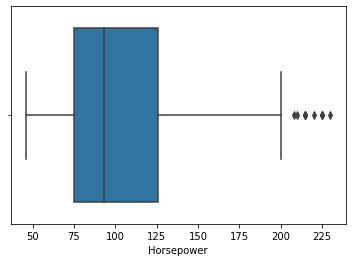

In [6]:

sns.boxplot(x=data["Horsepower"])

In [7]:


#to fill na values in horsepower column we fill it with median values
median_hrspw = data["Horsepower"].median()
#fillna->fill the na values with median horsepower values
data["Horsepower"] = data["Horsepower"].fillna(median_hrspw)

#New data info()
#check if there are any null values
print("\n New NUMBER OF NULL VALUES IN THE DATASET: \n")
print(data.isnull().sum())
print("\n New CHECK FOR NULL VALUES IN THE DATASET: \n")
print(data.isnull().any())








 New NUMBER OF NULL VALUES IN THE DATASET: 

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

 New CHECK FOR NULL VALUES IN THE DATASET: 

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool


In [8]:

print("\nNumber of different cylinders of each type:\n")
print(data["Cylinders"].value_counts())

print("\nPercentage distrbution of cylinder types:\n")
print("51%' of vehicles have 4 cylinders...")
print("25%' of vehicles have 8 cylinders...")
print(round(100*(data["Cylinders"].value_counts()/ len(data)),2))




Number of different cylinders of each type:

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

Percentage distrbution of cylinder types:

51%' of vehicles have 4 cylinders...
25%' of vehicles have 8 cylinders...
4    51.26
8    25.88
6    21.11
3     1.01
5     0.75
Name: Cylinders, dtype: float64


In [9]:
print("\nNumber of different values with their Origins\n")
print(data["Origin"].value_counts())
print("\nPercentage distrbution of Origin types:\n")
#print("51%' of vehicles have 4 cylinders...")
#print("25%' of vehicles have 8 cylinders...")
print(round(100*(data["Origin"].value_counts()/ len(data)),2))


Number of different values with their Origins

1    249
3     79
2     70
Name: Origin, dtype: int64

Percentage distrbution of Origin types:

1    62.56
3    19.85
2    17.59
Name: Origin, dtype: float64


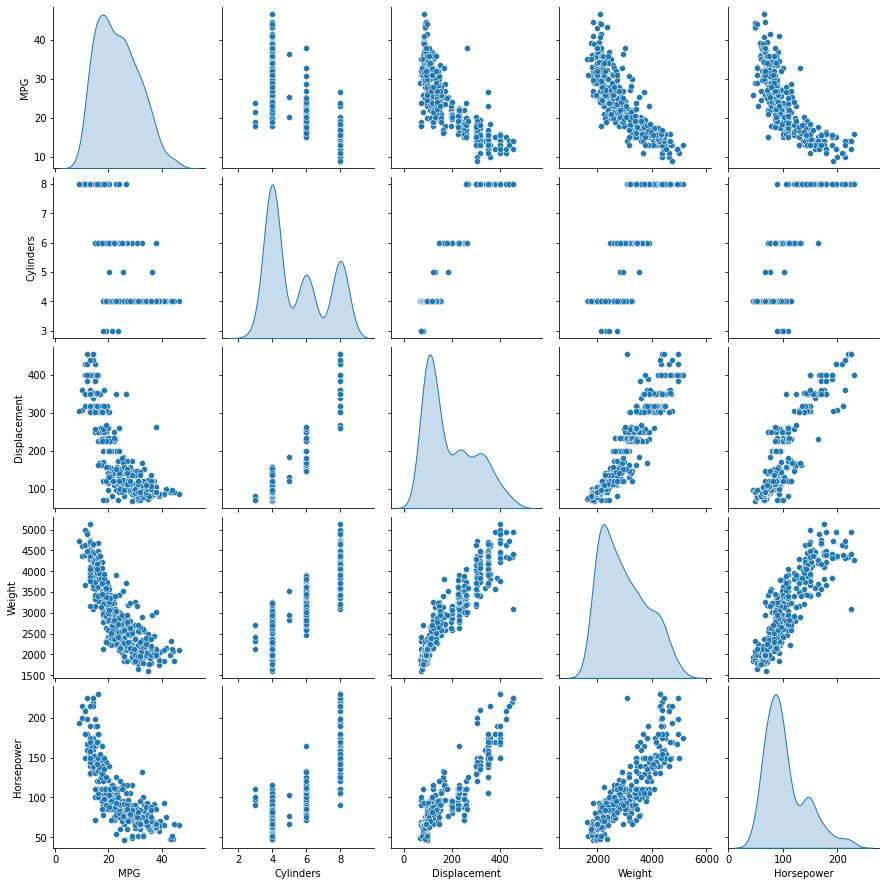

In [10]:
#plotting to get correlation
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")